# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [54]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Create two new dataframes
north_df = pd.read_csv("NorthCallCenter.csv")
south_df = pd.read_csv("SouthCallCenter.csv")

north_df.head(), south_df.head()

(   Unnamed: 0 Branch     Call Purpose Time Block Incoming or Outgoing Queue  \
 0           0  North        Complaint    9:00 AM             Incoming     B   
 1           1  North    Sales Support   11:00 AM             Incoming     A   
 2           2  North    Sales Support   11:00 AM             Incoming     B   
 3           3  North    Sales Support    4:00 PM             Incoming     B   
 4           4  North  Product Support   12:00 PM             Incoming     B   
 
   Rep ID Sale  Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
 0  Brent   NO          0          1             9                  2   
 1    Cam   NO          0          0            11                  1   
 2   Todd   NO          0          0             9                  3   
 3  Brent   NO          0          0            11                  2   
 4  Brent   NO          0          0             8                  2   
 
    Incoming Wait Time  During Call Wait Time  Calls  
 0                 1.0 

## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

#### EDA Question 1A:  How many reps are in the North branch?  

In [55]:
# EDA Question 1A solution below:
north_reps = north_df["Rep ID"].nunique()
north_reps

9

#### EDA Question 1B:  How many reps are in the South branch?  

In [56]:
# EDA Question 1B solution Below:
south_reps = south_df["Rep ID"].nunique()
south_reps

11

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [57]:
# EDA Question 2A solution Below:
north_avgs = north_df[["Busy Minutes", "Not Ready Minutes", "Incoming Wait Time", "During Call Wait Time"]].mean().round(2)
north_avgs

Busy Minutes             9.99
Not Ready Minutes        1.91
Incoming Wait Time       3.05
During Call Wait Time    2.97
dtype: float64

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [58]:
# EDA Question 2B solution Below:
south_avgs = south_df[["Busy Minutes", "Not Ready Minutes", "Incoming Wait Time", "During Call Wait Time"]].mean().round(2)
south_avgs

Busy Minutes             10.05
Not Ready Minutes         1.91
Incoming Wait Time        3.00
During Call Wait Time     3.08
dtype: float64

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [59]:
# EDA Question 3 solution Below:
combined = pd.concat([north_df, south_df], ignore_index=True)
calls_per_time = combined.groupby("Time Block")["Calls"].sum()
calls_per_time

Time Block
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: Calls, dtype: int64

##### Record your answers for the EDA section below:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
Busy Minutes           9.99
Not Ready Minutes        1.91
Incoming Wait Time       3.05
During Call Wait Time    2.97
- 2b) South Branch, (round to the nearest hundredth):
Busy Minutes             10.05
Not Ready Minutes         1.91
Incoming Wait Time        3.00
During Call Wait Time     3.08
- 3) Total Calls taken for all branches per time block:
> 
9:00 AM      10
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43



## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

In [60]:
# Question 1 solution below
north_df.isna().sum(), south_df.isna().sum() ## This finds any missing data in the north and south sets.




(Unnamed: 0                 0
 Branch                     0
 Call Purpose               0
 Time Block                 0
 Incoming or Outgoing       0
 Queue                      0
 Rep ID                     0
 Sale                       0
 Lost Call                  0
 Abandoned                  0
 Busy Minutes               0
 Not Ready Minutes          0
 Incoming Wait Time       163
 During Call Wait Time      0
 Calls                      0
 dtype: int64,
 Unnamed: 0                 0
 Branch                     0
 Call Purpose               0
 Time Block                 0
 Incoming or Outgoing       0
 Queue                      0
 Rep ID                     0
 Sale                       0
 Lost Call                  0
 Abandoned                  0
 Busy Minutes               0
 Not Ready Minutes          0
 Incoming Wait Time       188
 During Call Wait Time      0
 Calls                      0
 dtype: int64)

#### Record your answer below:

> Your Answer: 
 For numeric fields, I would fill missing values with either 0 or the median depending on context. 
 For categorical fields, I would fill missing values with the mode or with ‘Unknown’. 
 If any rows were missing several important fields, I would remove those rows. 
 After cleaning, I would re-check to ensure no missing values remain.

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [61]:
# Cleaning Question 2 solution below:
north_df["Sale"] = north_df["Sale"].str.strip().str.upper() ## fix inconsistent capitalization or trailing spaces:
north_df["Sale"].unique()


array(['NO', 'YES'], dtype=object)

##### Record your answer by below:
> Your Answer: 
 I checked the ‘Sale’ column for inconsistent values (such as ‘YES’, ‘Yes’, or ‘yes’). To clean this, I standardized the formatting by stripping extra spaces and converting all text to uppercase using str.strip().str.upper(). This ensures that all entries use the same standardized value. After cleaning, I rechecked unique values to confirm the duplicates were resolved.

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [62]:
# Cleaning Question 3 solution below:
north_df.duplicated().sum(), south_df.duplicated().sum()
north_df = north_df.drop_duplicates()
south_df = south_df.drop_duplicates()
print("North duplicates:", north_df.duplicated().sum())
print("South duplicates:", south_df.duplicated().sum())

North duplicates: 0
South duplicates: 0


##### Record your answer below:
> Your Answer: 
 I checked to see if there was duplicates in the data set and used the drop argument to clear them. I cleared them before I checked to see if there was any, so I am unsure if there is.

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [63]:
# Cleaning Question 4 solution below:
north_df.columns
south_df.columns

north_df = north_df.drop(columns=["Sale"])
south_df = south_df.drop(columns=["Sale"])

##### Record your answer below:
> Your Answer: The only unnecessary data field was the Sale column. None of the assignment tasks require analyzing sales, nor is the Sale field used in any KPIs such as abandonment rate, service level, or average speed of answer.

## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [64]:
# Create dataframe for the entire company named df
df = pd.concat([north_df, south_df], ignore_index=True)



#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [65]:
# Manipulation Question solution below:
rep_totals = df.groupby(["Branch", "Rep ID"])["Calls"].sum()
rep_totals

north_top = rep_totals["North"].idxmax(), rep_totals["North"].max()
south_top = rep_totals["South"].idxmax(), rep_totals["South"].max()

print(f'North Branch = {north_top}, South Branch =  {south_top}')



North Branch = ('Brent', np.int64(37)), South Branch =  ('Eric', np.int64(35))


##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch = Brent ID 37
- South Branch = Eric ID 35

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [66]:
# Manipulation Question 2 solution below:
north_abandon = north_df["Abandoned"].sum() / north_df["Calls"].sum() * 100
south_abandon = south_df["Abandoned"].sum() / south_df["Calls"].sum() * 100
company_abandon = df["Abandoned"].sum() / df["Calls"].sum() * 100

north_abandon, south_abandon, company_abandon


(np.float64(2.857142857142857),
 np.float64(1.2738853503184715),
 np.float64(1.9677996422182469))

##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.88%
- South Branch = 1.27%
- Company-Wide = 1.97%
- Do any of these fall out of the optimal range of 2-5%? Yes, two of these fall outside of the optimal range: South and Company-wide.

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [67]:
# Manipulation Question 3 solution below:
north_sl = (north_df[north_df["Incoming Wait Time"] <= 2]["Calls"].sum() 
            / north_df[north_df["Incoming or Outgoing"]=="Incoming"]["Calls"].sum()) * 100

south_sl = (south_df[south_df["Incoming Wait Time"] <= 2]["Calls"].sum() 
            / south_df[south_df["Incoming or Outgoing"]=="Incoming"]["Calls"].sum()) * 100

company_sl = (df[df["Incoming Wait Time"] <= 2]["Calls"].sum() 
              / df[df["Incoming or Outgoing"]=="Incoming"]["Calls"].sum()) * 100

north_sl, south_sl, company_sl


(np.float64(40.243902439024396),
 np.float64(38.095238095238095),
 np.float64(38.94230769230769))

##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40%
- South Branch = 38%
- Company Wide = 39%

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [68]:
# Manipulation Question 4 solution below:
north_speed = north_df["Incoming Wait Time"].mean()
south_speed = south_df["Incoming Wait Time"].mean()
company_speed = df["Incoming Wait Time"].mean()

north_speed, south_speed, company_speed


(np.float64(3.048780487804878), np.float64(3.0), np.float64(3.019230769230769))

##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05
- South Branch in seconds = 3
- Company Wide in seconds = 3.02

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

C:\Users\justi\AppData\Local\Temp\ipykernel_27796\2043262786.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i]


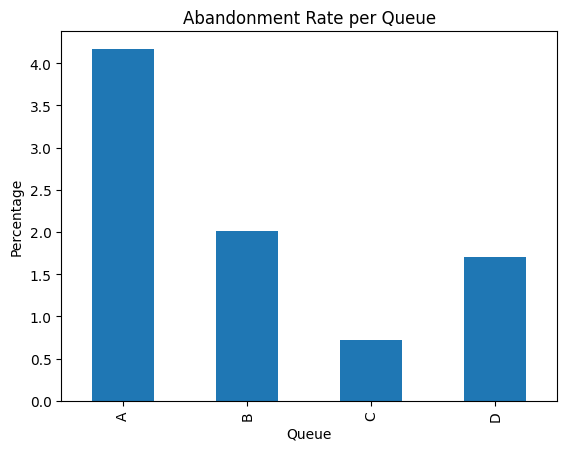

In [69]:
# Create visualization 1 here
# Import any additional libraries needed with alias

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

#Your code below:
queue_group = df.groupby("Queue").sum()
abandon_rates = (queue_group["Abandoned"] / queue_group["Calls"]) * 100

abandon_rates.plot(kind="bar")
plt.title("Abandonment Rate per Queue")
plt.ylabel("Percentage")
plt.show()


##### Record your answer below:

> Chart style you chose and why: A bar chart was simple enough to show the difference between Queues

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

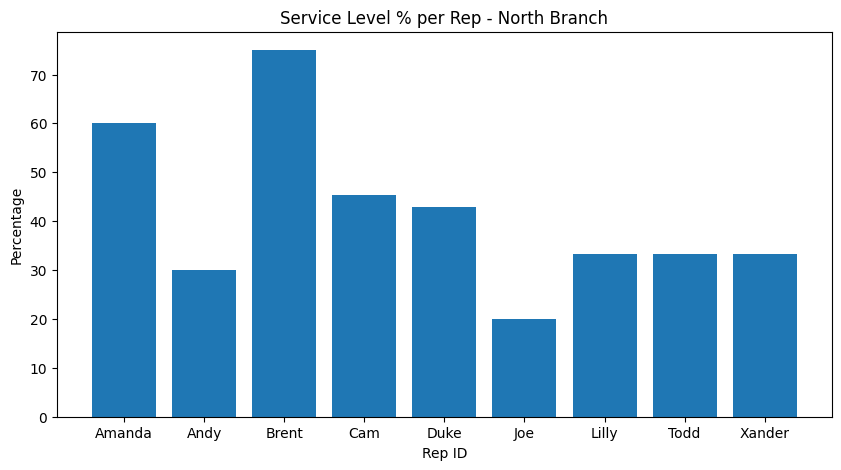

In [70]:
north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Table 1: Total Incoming calls <= 2 seconds
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby("Rep ID").sum()

# Table 2: Total Incoming Calls
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]
total_stats = rep_calls.groupby("Rep ID").sum()

# Merge (outer joins protect against missing reps)
service_level = pd.merge(
    quick_stats,
    total_stats,
    on="Rep ID",
    how="outer"
).fillna(0)

service_level["Service Level %"] = (service_level["Calls_x"] /
                                    service_level["Calls_y"] * 100)

# Plot (example)
plt.figure(figsize=(10,5))
plt.bar(service_level.index, service_level["Service Level %"])
plt.title("Service Level % per Rep - North Branch")
plt.ylabel("Percentage")
plt.xlabel("Rep ID")
plt.show()


##### Record your answer below:

> Chart style you chose and why: A bar chart was simple enough to show the difference between Rep. percentages.

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: count, dtype: int64


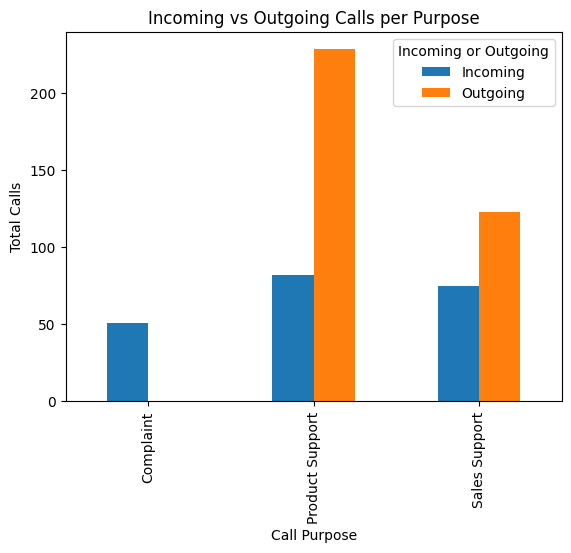

In [71]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:
purpose_group = df.groupby(["Call Purpose", "Incoming or Outgoing"])["Calls"].sum().unstack()

purpose_group.plot(kind="bar")
plt.title("Incoming vs Outgoing Calls per Purpose")
plt.ylabel("Total Calls")
plt.show()


##### Record your answer below:

> Chart style you chose and why: Yet again, a bar chart was simple enough to show the different Total Call Values for both call purposes.

## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
> Your Answer: I think the North branch is running more efficient. Their abandon rate is lower, their service level is a little higher, and they answer calls a bit faster. Overall their numbers just look better so they seem to be handling calls smoother.



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> Your Answer: The South branch probably needs the extra help more. Their reps seem slower and their KPIs aren’t as good. So adding more people there would help take pressure off and make the calls move better.


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Your Answer: I wish we had more general info, like how long each call actually takes, rep schedules, and maybe customer ratings. That would make the analysis easier. Also knowing the difficulty of the calls would help too. It would have called for more than just bar charts.


## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why: 

In [72]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: